In [ ]:
This notebook is based on an implementation from https://github.com/stanfordnmbl/sit2stand-analysis. 

In [15]:
import git
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
homedir

'C:\\Users\\amanda\\Documents\\GitHub\\cs231n'

In [16]:
import sys
 
# setting path
sys.path.append(homedir)

In [17]:
%load_ext autoreload
%autoreload 2
from utils import process_subject, run_openpose
import os
import numpy as np
import pandas as pd
import pickle
import traceback
from utils import videometa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


R
[ 74 121 157 208 260]
[ 49  91 136 183 235]
[ 32  74 121 157 208 260]
[ 49  91 136 183 235]


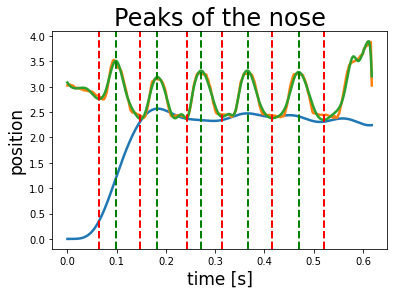

3.5866781672538943


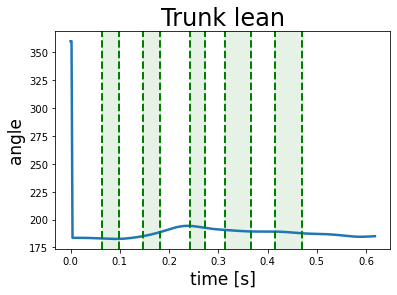

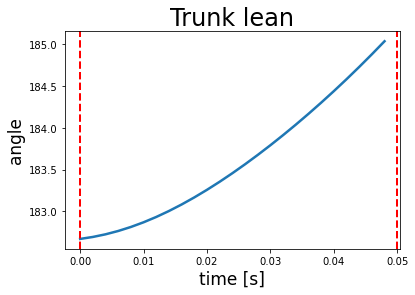

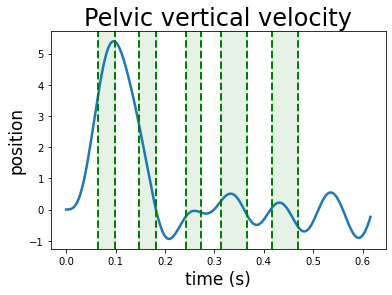

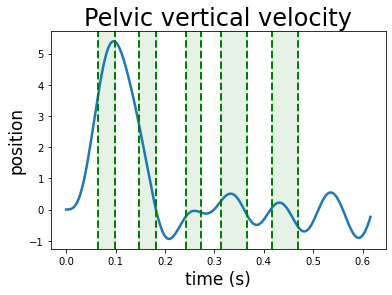

{'subjectid': '0B2dfO4b',
 'orientation': 'R',
 'framerate': 500,
 'n': 5,
 'time': 0.45599999999999996,
 'time_diff': 0.0049999999999999975,
 'speed': 10.96,
 'time_sd': 0.011906300852909772,
 'speed_sd': 1.5810084097932517,
 'n_sit2stand': 5,
 'time_sit2stand': 0.204,
 'time_diff_sit2stand': -0.008000000000000002,
 'speed_sit2stand': 24.51,
 'time_sd_sit2stand': 0.010087616170334792,
 'speed_sd_sit2stand': 5.980825083770582,
 'n_stand2sit': 4,
 'time_stand2sit': 0.202,
 'time_diff_stand2sit': 0.013000000000000001,
 'speed_stand2sit': 19.8,
 'time_sd_stand2sit': 0.0063835726674018505,
 'speed_sd_stand2sit': 2.5281857835232486,
 'left_knee_range_mean': 10.65983504228937,
 'left_knee_sd': 3.62690755207434,
 'left_knee_max': 150.72977869049484,
 'left_knee_min': 122.71781667503664,
 'left_knee_max_mean': 143.94420656388655,
 'left_knee_min_mean': 133.63817990860338,
 'left_knee_max_sd': 8.285526196049025,
 'left_knee_min_sd': 6.444712484886778,
 'left_knee_ang_vel': 0.052631960276983136,

In [29]:
# Process a subject (quick test)
process_subject("0B2dfO4b", processed_npy_path="{}/videos/np/".format(homedir) , framerate=500)

In [31]:
# Get a list of all subjects
subjects = os.listdir("{}/videos/keypoints/".format(homedir))

0B2dfO4b
R
[ 74 121 157 208 260]
[ 49  91 136 183 235]
[ 32  74 121 157 208 260]
[ 49  91 136 183 235]


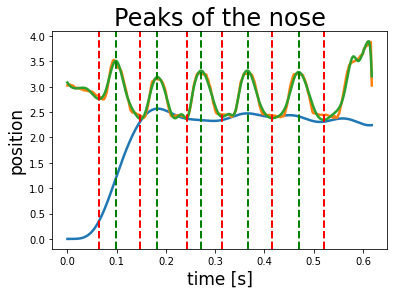

3.5866781672538943


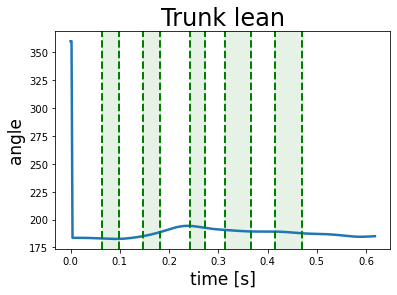

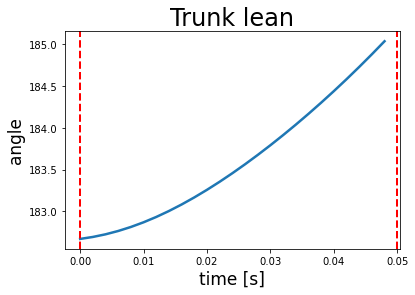

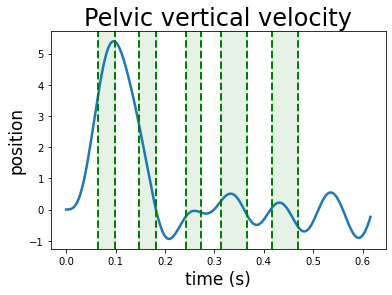

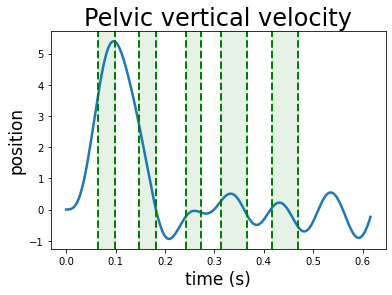

[]


In [33]:
skipped = []
all_res = []

# Convert OpenPose frames to a numpy array
for subjectid in subjects: #).difference(set(toremove + tocheck)):
    print(subjectid)
    try:
        results = process_subject(subjectid, processed_npy_path="{}/videos/np/".format(homedir) , framerate=500)
    except Exception as e:
        traceback.print_exc()
        skipped.append(subjectid)
        print("Skipped " + subjectid)
        continue
    all_res.append(results)    
print(skipped)

In [34]:
# Write ids of all videos that were skipped
for s in skipped:
    print(s)

In [35]:
# Print out and save results
res_df = pd.DataFrame(all_res)
res_df

,subjectid,orientation,framerate,n,time,time_diff,speed,time_sd,speed_sd,n_sit2stand,...,neck_max_y_acc_stand2sit,ank_to_hip_dist_sit,ank_to_hip_dist_stand,knee_to_hip_dist_sit,knee_to_hip_dist_stand,height,lknee_angle_first_sit,rknee_angle_first_sit,lknee_angle_first_stand,rknee_angle_first_stand
0,0B2dfO4b,R,500,5,0.456,0.005,10.96,0.011906,1.581008,5,...,140.464987,1.232412,1.217529,0.945666,0.929226,0.763421,122.970041,116.328133,122.712669,115.873308


In [36]:
res_df.to_csv("{}/results/results-20230427.csv".format(homedir))